In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Reading & understanding the Input Data

In [3]:
bike_df = pd.read_csv('day.csv')
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
bike_df.shape

(730, 16)

### 2. Pre procesing steps

In [5]:
# verifying any null values in the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the above code output we observed that there are no null or missing values in the data-set.

In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data Cleaning

#### Dropping the columns which are not needed in the process

In [7]:
# dropping column 'instant' - As it is the index of the dataset provided
# dropping column 'dteday'  - As it provides the date and same can be concluded from mnth, yr and weekday
# dropping columns 'casual' and 'registered' - As the target variable is captured in column 'cnt'

bike_df.drop(['instant','dteday','casual','registered'], axis =1 , inplace = True)

bike_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [8]:
bike_df.shape

(730, 12)

In [9]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Mapping the categorical columns 
season, month, weekday, weathersit columns contain more than two categories

In [10]:
bike_df['season'] = bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [11]:
bike_df['mnth'] = bike_df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [12]:
# from the given data-set, after comparing the dates and weekdays, we observed that are mapped as 0- tue, 1- wed, 2-thu, 3-fri, 4-sat, 5-sun, 6-mon
bike_df['weekday'] = bike_df['weekday'].map({0:'tue',1:'wed',2:'thu',3:'fri',4:'sat',5:'sun',6:'mon'})

In [13]:
bike_df['weathersit'] = bike_df['weathersit'].map({1:'clear',2:'mist',3:'light_snow',4:'heavy_rain'})

In [14]:
bike_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,sat,1,clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,sun,1,mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,mon,0,mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,tue,0,clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,wed,1,clear,6.184153,7.54440,48.2917,14.958889,1321


In [15]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### 3. EDA

In [16]:
# separating the categorical and numerical columns
cat_cols = ['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

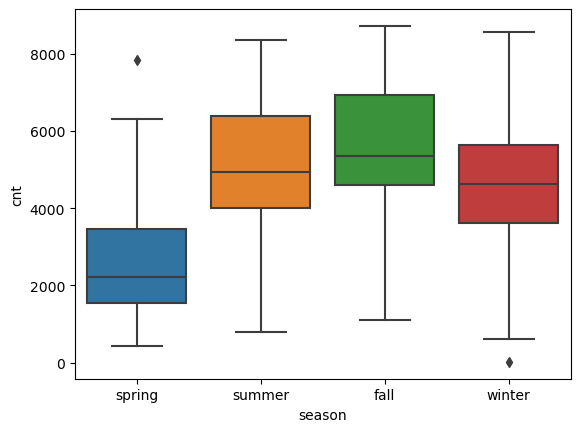

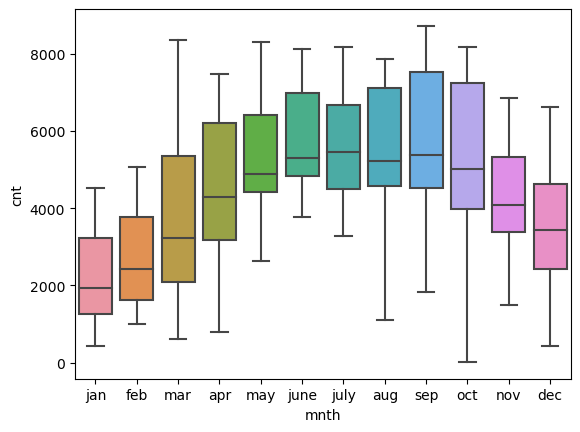

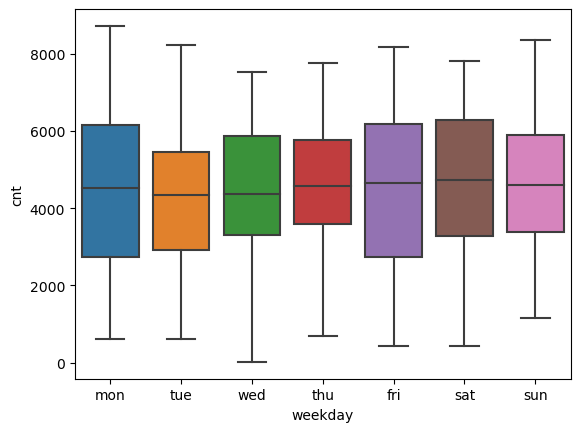

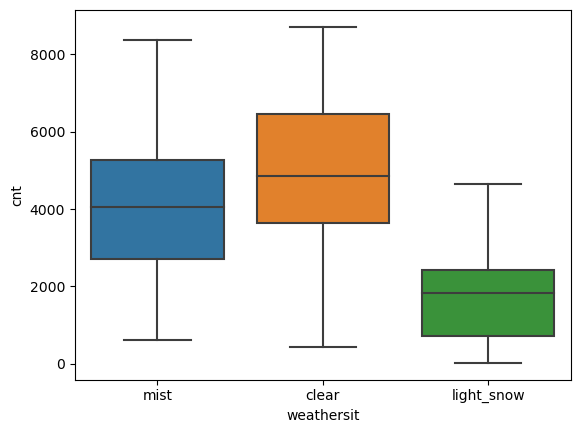

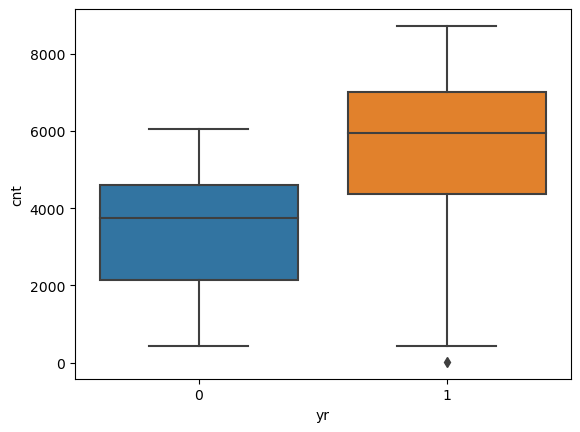

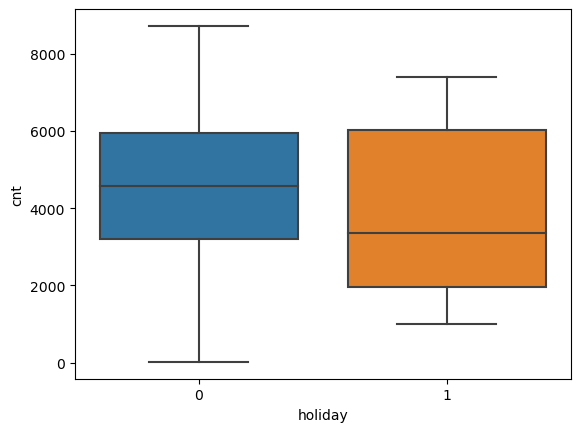

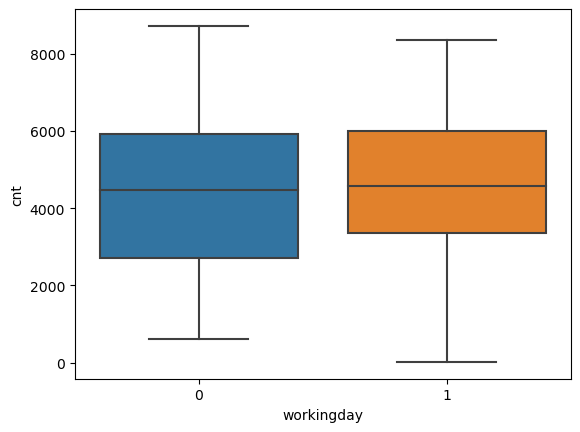

In [17]:
# Analysing the categorical columns, and how they impact the target variable - 'cnt'

for i in cat_cols:
    sns.boxplot(x = bike_df[i], y = bike_df['cnt'])
    plt.show()

From the above box-plots, we observed the following: 
1. Demand for the bike is higher during Fall season, followed by Summer season. 
2. The above point correlates with the calendar months Aug - Oct. 
3. Monday seems to have higher bike demand. 
4. Bike demand is higher during Clear weather. 
5. There is an increase in demand in 2019 when compared to 2018.
6. During holidays, the demands falls when compared to working days.


In [18]:
# studying the count as per the categorical variables across year 2018 and 2019.

# defining a function to study the categorical columns count
def plot_count_cat_cols(col):
    plt.figure(figsize = (15, 6))
    
    plt.subplot(1,2,1)
    sns.barplot(data=bike_df, x= col, y='cnt', hue='yr', errorbar=None)
    plt.legend(labels=['2018', '2019'])
    
    plt.subplot(1,2,2)
    sns.barplot(x=col,y='cnt',data=bike_df,errorbar=None)
       
    plt.show()

#### 2019 has received more bookings than 2018 across all categories, that is evident from below plots.

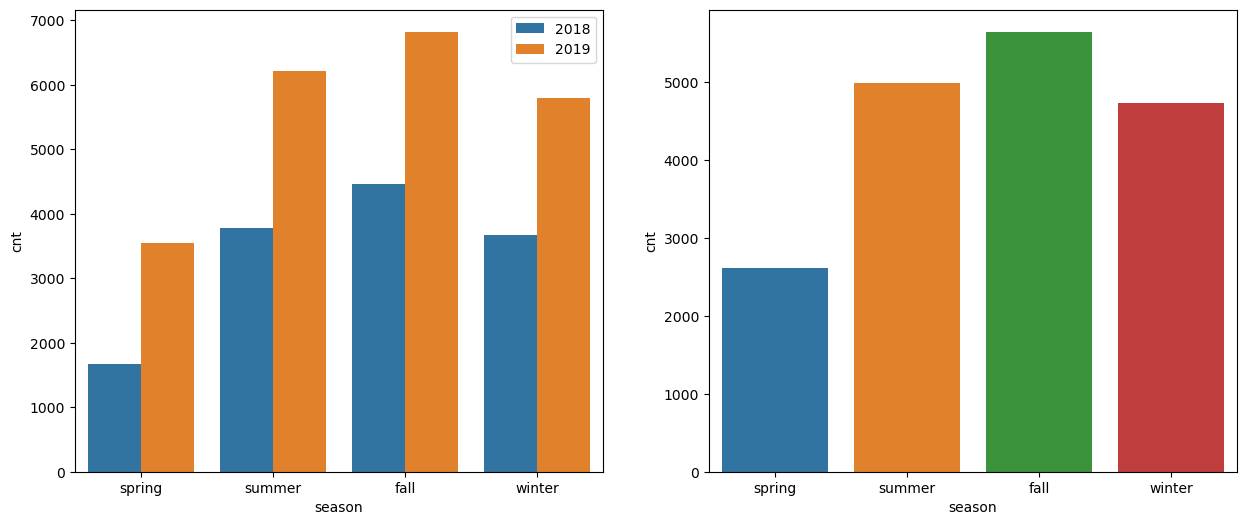

In [20]:
plot_count_cat_cols('season')

Number of bookings in Fall is highest in comparison to other seasons.

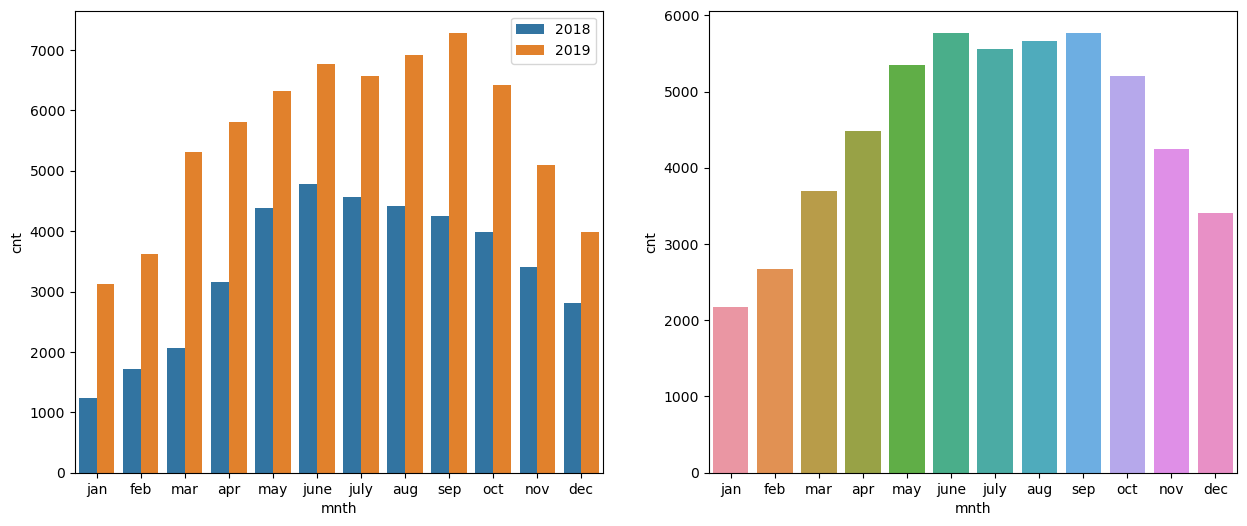

In [21]:
plot_count_cat_cols('mnth')

There is an increasing booking trend from beginning of the yar till month of Sep, then there is gradual decline in bookings, as Winter is approaching.

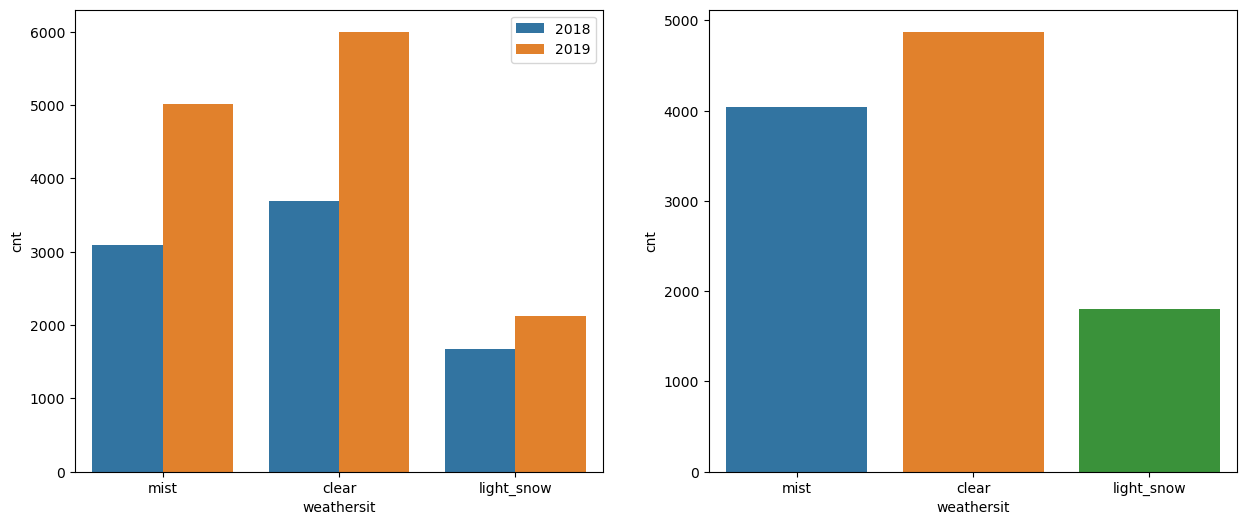

In [22]:
plot_count_cat_cols('weathersit')

Clear weather attracts more booking followed by mist weather and light rain and snow weather respectively. 
It is observed that there is no data points for heavy rain and snow weather in the date-set.

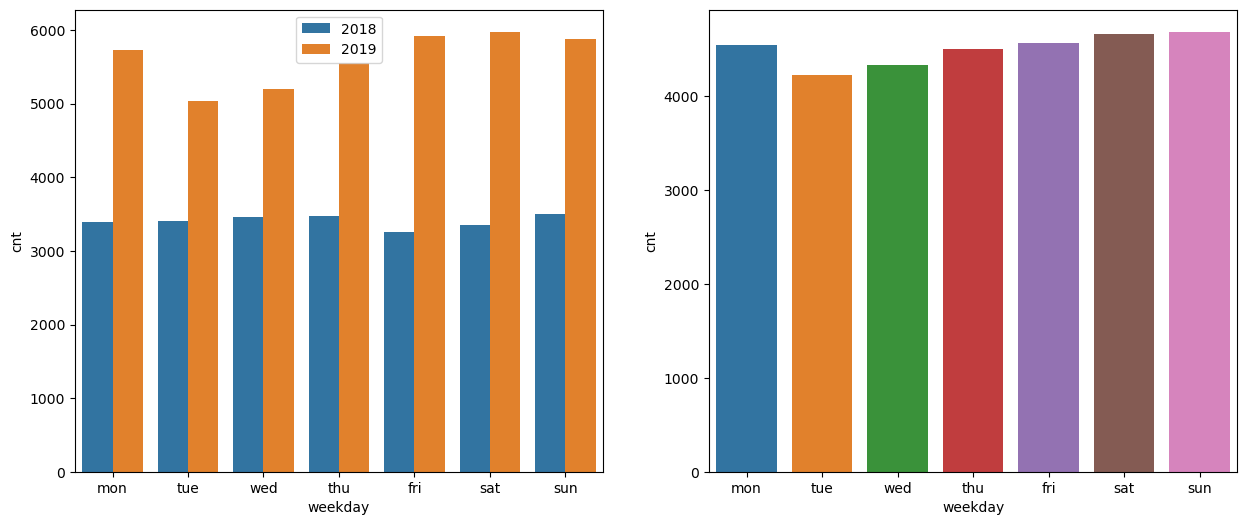

In [23]:
plot_count_cat_cols('weekday')

It is observed that bookings remain steady across weekdays, with slight decrease in demand on Tuesday

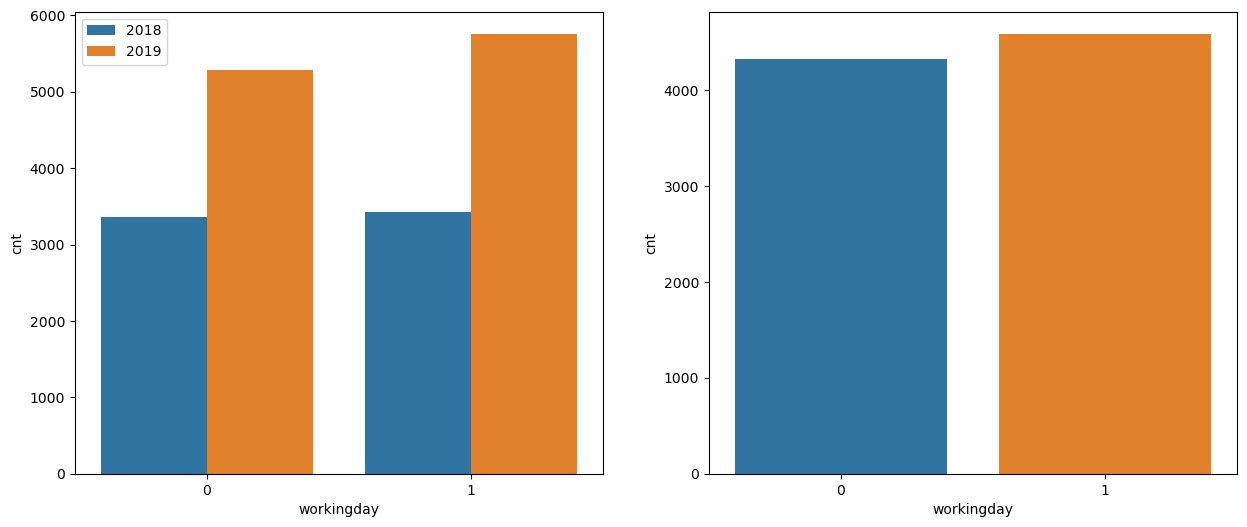

In [25]:
plot_count_cat_cols('workingday')

It is observed that workingday gets marginally higher booking than non-workingday.

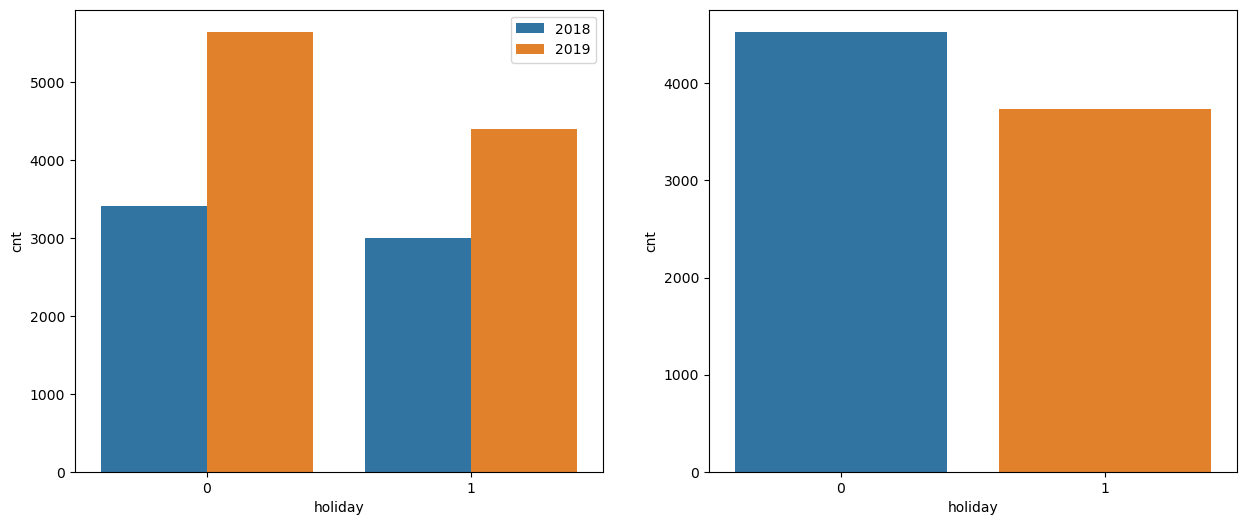

In [26]:
plot_count_cat_cols('holiday')

There is less bookings on holiday, which is also relatable from previous graph that workingday gets higher bookings.

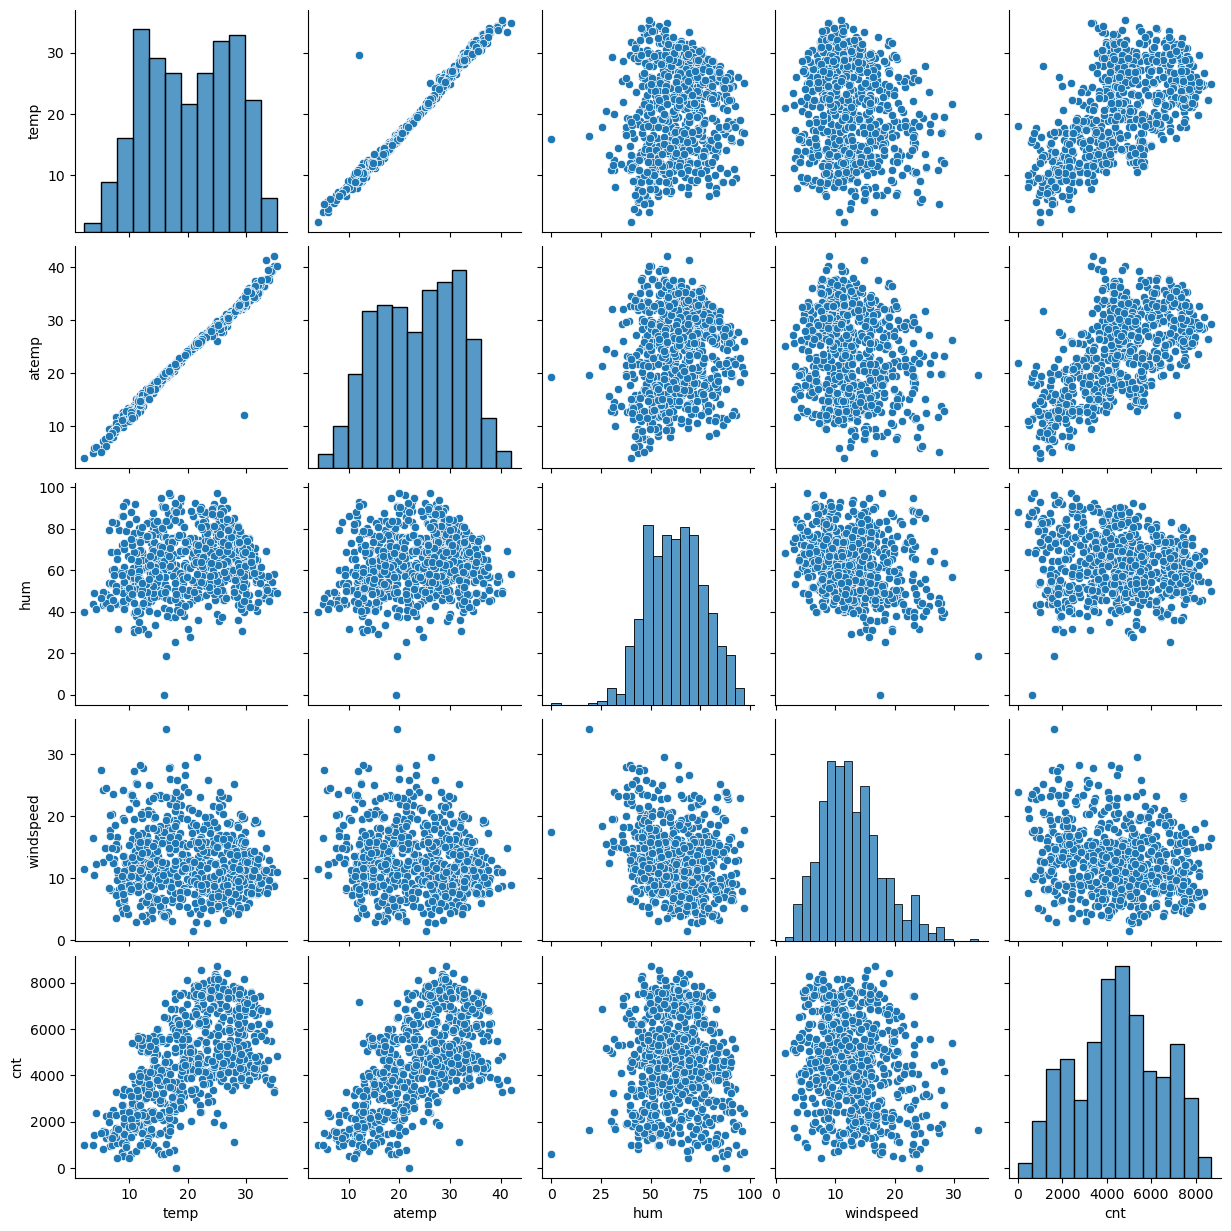

In [27]:
# Analysing the numerical columns, and how they impact the target variable - 'cnt'

sns.pairplot(data = bike_df, vars = num_cols)
plt.show()

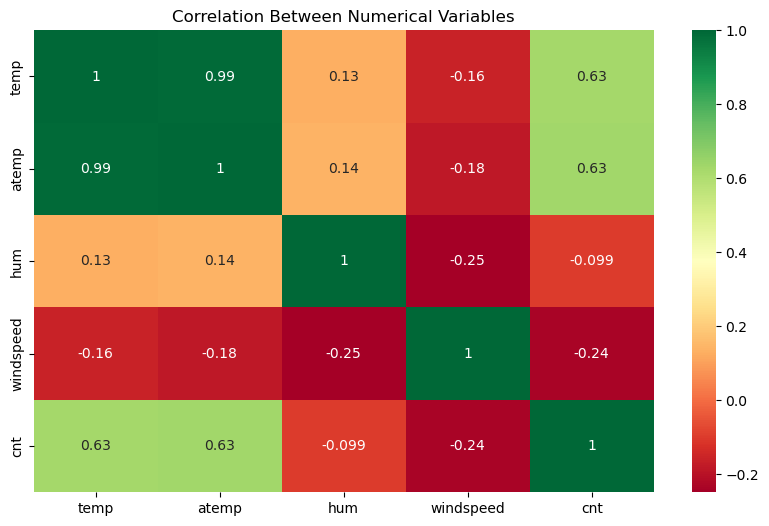

In [28]:
# checking the correlation between numerical variables

plt.figure(figsize = (10,6))
sns.heatmap(bike_df[num_cols].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation Between Numerical Variables")
plt.show()

It is observed that 'temp' and 'atemp' have almost a correlation if 1, so these two features need to be analysed for multicollinearity.

## 4. Creating Dummy columns

In [24]:
# Creating Dummy for categorical variables -  'season', 'weathersit', 'mnth', 'weekday'

season_df = pd.get_dummies(bike_df['season'], drop_first = True, dtype = int)
weathersit_df = pd.get_dummies(bike_df['weathersit'], drop_first = True, dtype = int)
mnth_df = pd.get_dummies(bike_df['mnth'], drop_first = True, dtype = int)
weekday_df = pd.get_dummies(bike_df['weekday'], drop_first = True, dtype = int)


In [25]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# concating the bike_df with dummy dataframes.

bike_df_new = pd.concat([bike_df, season_df, weathersit_df, mnth_df, weekday_df], axis = 1)
bike_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,mon,0,mist,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,jan,0,tue,0,mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# dropping the categorical columns from which Dummy columns are derived
bike_df_new.drop(['season', 'weathersit', 'mnth', 'weekday'], axis=1, inplace = True)
bike_df_new.shape

(730, 30)

In [33]:
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   spring           730 non-null    int32  
 9   summer           730 non-null    int32  
 10  winter           730 non-null    int32  
 11  light_rain_snow  730 non-null    int32  
 12  mist             730 non-null    int32  
 13  aug              730 non-null    int32  
 14  dec              730 non-null    int32  
 15  feb              730 non-null    int32  
 16  jan              730 non-null    int32  
 17  july            

## 5. Splitting the Data into Training and Test set

In [28]:
train_df, test_df =  train_test_split(bike_df_new, train_size = 0.7, random_state = 100)
print(train_df.shape)
print(test_df.shape)

(510, 30)
(220, 30)


In [35]:
train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,1,0,0,0


we have to scale the numerical variables as we can observed from the above data.

## 6. Scaling of Train data using MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
# Scaling the numeric variables

train_df[num_cols]= scaler.fit_transform(train_df[num_cols])


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    float64
 8   spring      510 non-null    int32  
 9   summer      510 non-null    int32  
 10  winter      510 non-null    int32  
 11  light_snow  510 non-null    int32  
 12  mist        510 non-null    int32  
 13  aug         510 non-null    int32  
 14  dec         510 non-null    int32  
 15  feb         510 non-null    int32  
 16  jan         510 non-null    int32  
 17  july        510 non-null    int32  
 18  june        510 non-null    int32  
 19  mar         510 non-null    int3

In [32]:
train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


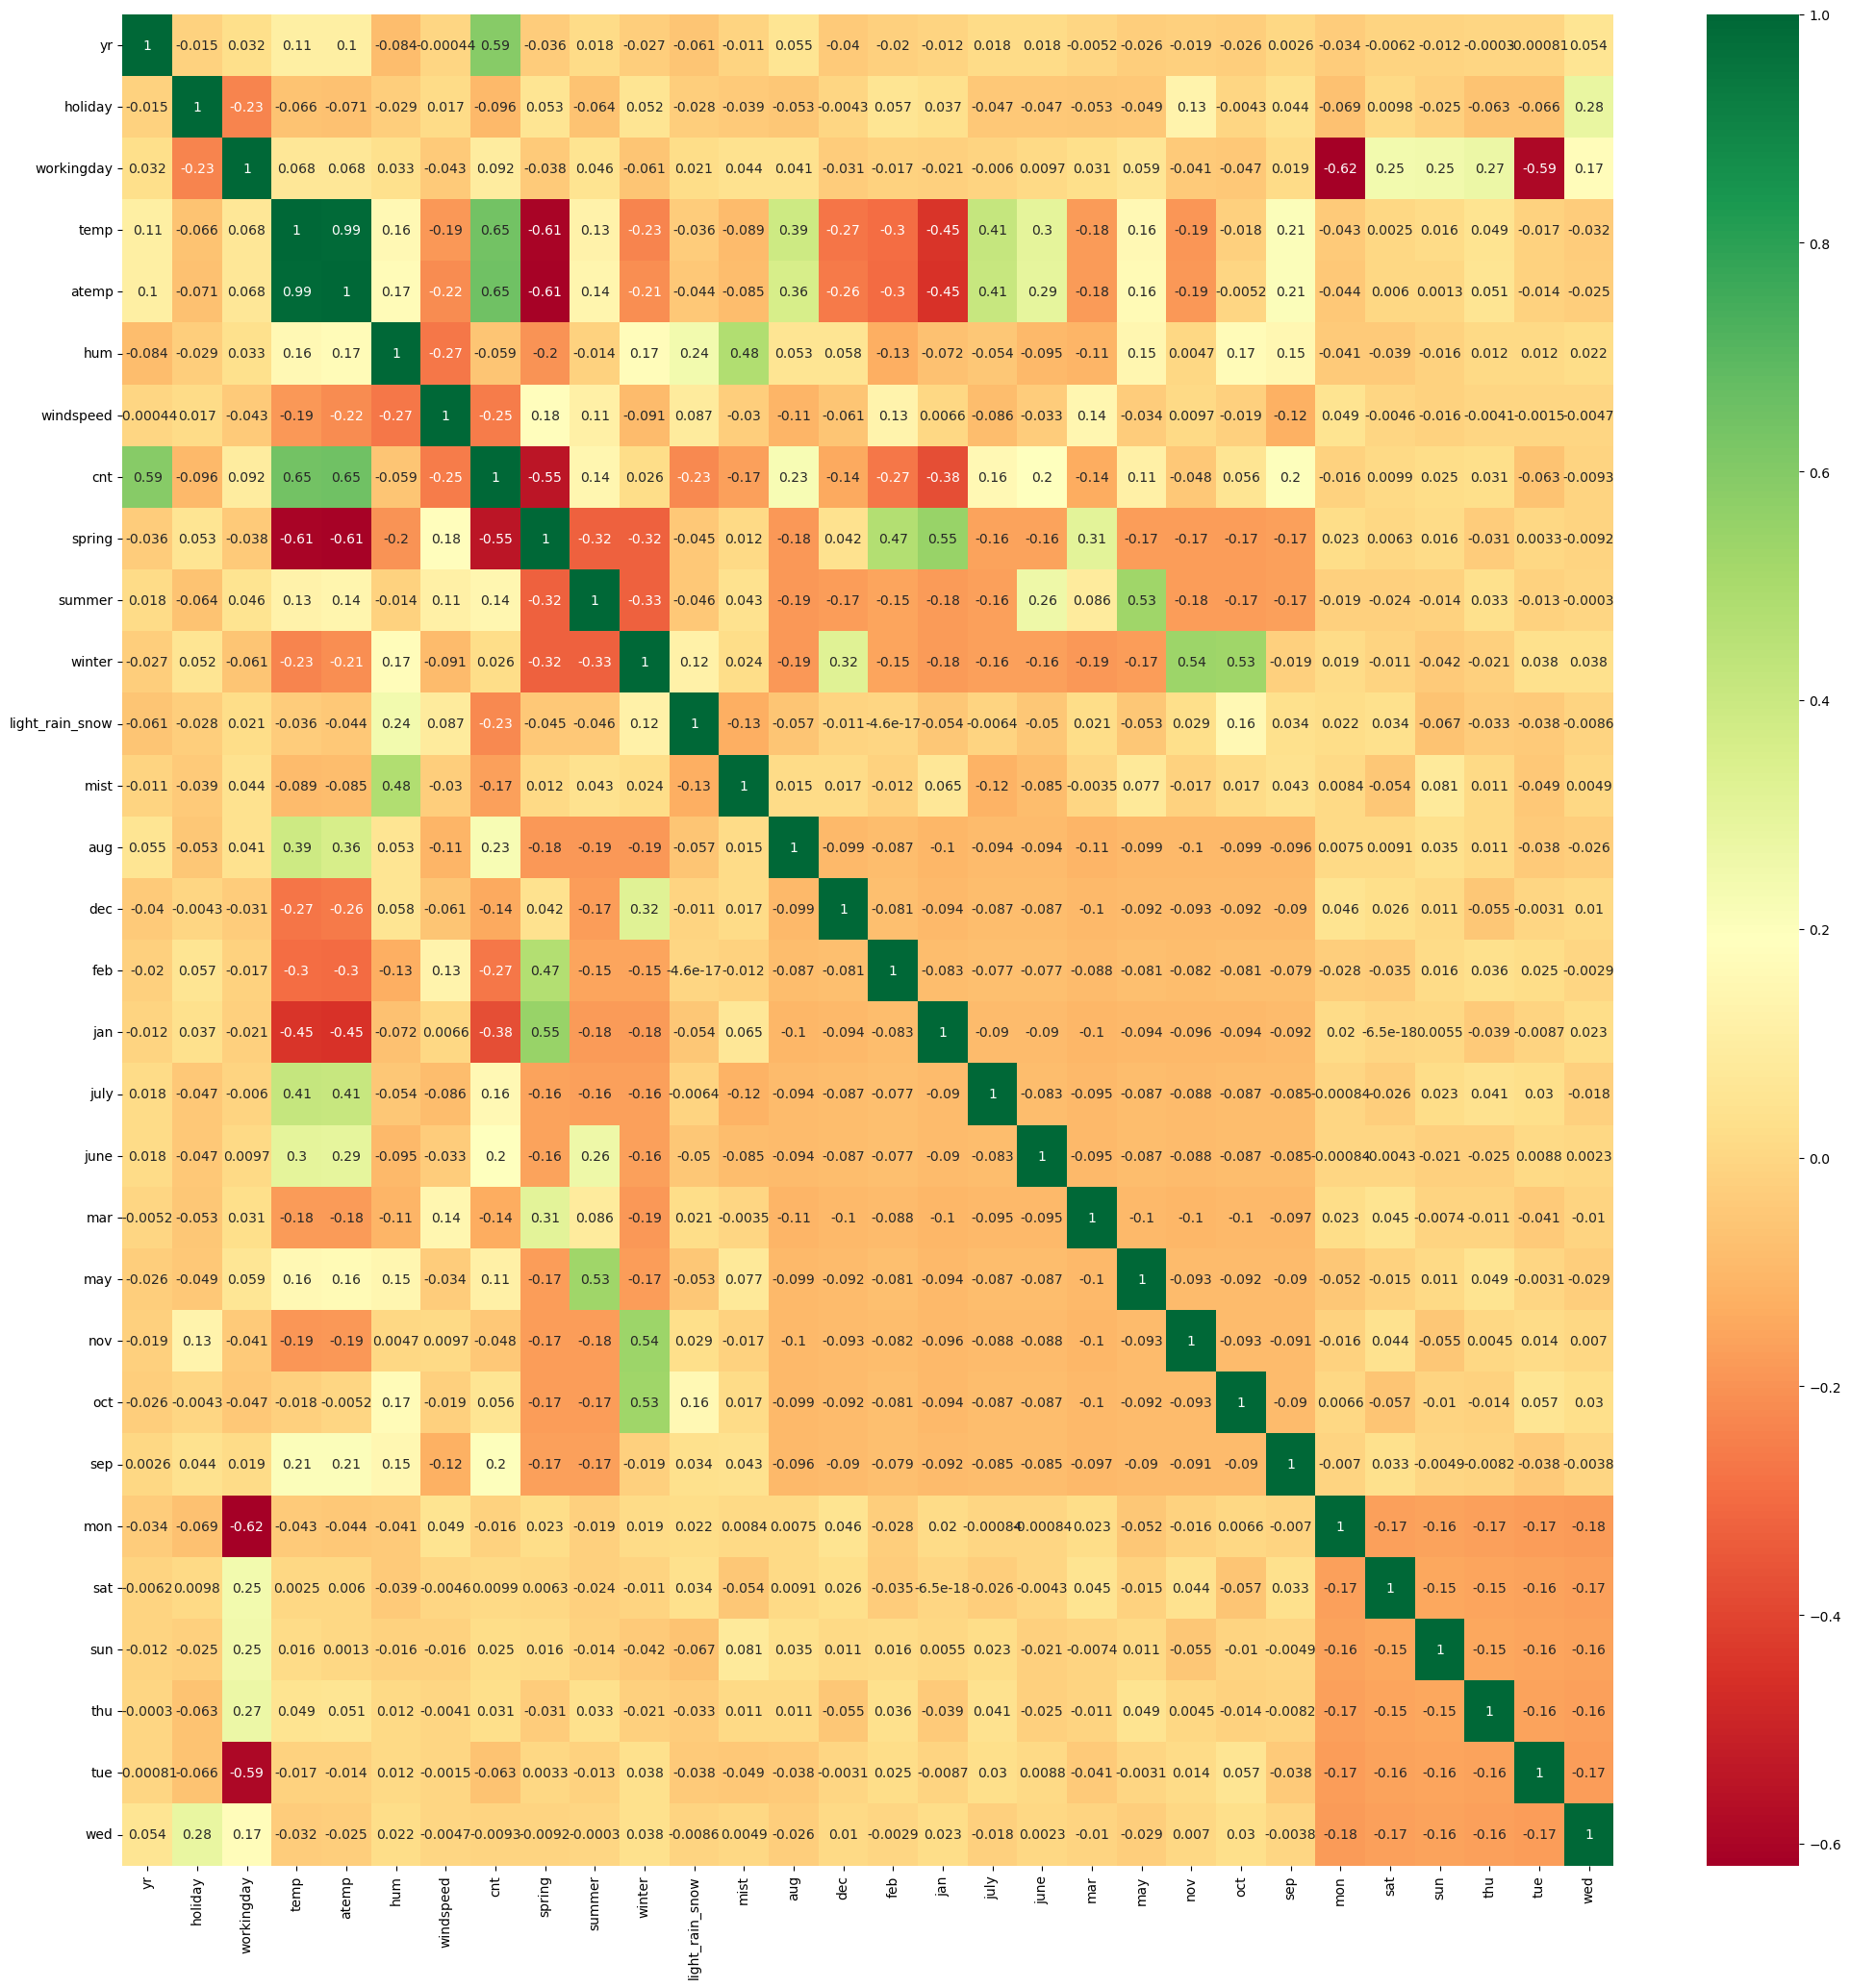

In [40]:
# checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(train_df.corr(), annot = True, cmap="RdYlGn")
plt.show()

From the above heatmap, it is visible that Winter is correlated with Oct-Nov, Spring correlated with Jan-Feb, Summer is correlated with May, which is quite understandable as these months of the year corresponds to respective seasons. Similarly, Mist weather correlates with humidity. We also observed that there is a correlation between temp and cnt columns.

## 7. Feature Selection

In [34]:
# separating the target variable and predictor variable from the training data-set
train_y = train_df.pop('cnt') ## the target variable 'y' as 'cnt'
train_X = train_df           ## the predictor variables 'x' as remaining variables

In [35]:
print(train_y.shape)
print(train_X.shape)

(510,)
(510, 29)


##### Using RFE

In [36]:
# eleminating the features with high correlation by using RFE functionality of sk-learn library

lm = LinearRegression()

selector = RFE(lm, n_features_to_select = 15)  ## selecting 15 features
selector = selector.fit(train_X, train_y)
selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False])

In [37]:
# list of the 15 columns selected by RFE
train_X.columns[selector.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'light_snow', 'mist', 'jan', 'july', 'sep', 'mon'],
      dtype='object')

In [38]:
# list of the columns rejected by RFE
train_X.columns[~selector.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'sat',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [39]:
# List of column ranks by RFE
list(zip(train_X.columns,selector.support_,selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light_snow', True, 1),
 ('mist', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 14),
 ('sun', False, 11),
 ('thu', False, 10),
 ('tue', False, 8),
 ('wed', False, 9)]

In [40]:
# reassigning the training dataframe with RFE columns
train_X = train_X[train_X.columns[selector.support_]]
train_X.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,light_snow,mist,jan,july,sep,mon
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0


## 8. Building LR Model

First Model

In [41]:
train_X_sm = sm.add_constant(train_X) # adding the constant term or intercept.

lr1 = sm.OLS(train_y, train_X_sm).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          4.22e-191
Time:                        20:03:15   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

In [42]:
# Checking Multicollinearity using Variance-Inflation-Factor
# Defining a function VIF

def get_vif(train_X):
    vif_data=pd.DataFrame()
    vif_data['Feature']=train_X.columns
    vif_data['VIF']=[variance_inflation_factor(train_X.values,i) for i in range (len(train_X.columns))]
    vif_data.sort_values('VIF', ascending = False, inplace = True)

    return vif_data

In [43]:
res_vif = get_vif(train_X)
print(res_vif)

       Feature        VIF
4          hum  29.370804
3         temp  17.780645
2   workingday   5.306978
5    windspeed   4.728655
6       spring   4.531273
8       winter   3.460305
7       summer   2.849835
10        mist   2.288222
0           yr   2.088739
14         mon   1.975769
11         jan   1.673632
12        july   1.592029
13         sep   1.389751
9   light_snow   1.244703
1      holiday   1.176531


We observe that 'hum' has the highest VIF factor, so dropping this feature and again building the model.

Second Model

In [44]:
# Dropping 'hum' from the features
train_X.drop(['hum'], axis = 1, inplace = True)
train_X.head()

,yr,holiday,workingday,temp,windspeed,spring,summer,winter,light_snow,mist,jan,july,sep,mon
576,1,0,1,0.815169,0.264686,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.255342,1,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,0,1,0,0,1,0,0,0,1
111,0,0,1,0.345824,0.380981,0,1,0,0,1,0,0,0,0


In [45]:
train_X_sm = sm.add_constant(train_X) # adding the constant term or intercept.

lr2 = sm.OLS(train_y, train_X_sm).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.60e-188
Time:                        20:05:18   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.520      0.0

In [46]:
res_vif = get_vif(train_X)
print(res_vif)

       Feature       VIF
3         temp  7.070219
2   workingday  5.243195
4    windspeed  4.675805
5       spring  3.074591
6       summer  2.340269
0           yr  2.075193
7       winter  1.977789
13         mon  1.968247
10         jan  1.621723
11        july  1.591949
9         mist  1.579492
12         sep  1.347336
1      holiday  1.174038
8   light_snow  1.085783


In [47]:
# dropping the 'temp' feature first as its VIF value is greater than 5
train_X.drop(['temp'], axis = 1, inplace = True)
train_X.head()

,yr,holiday,workingday,windspeed,spring,summer,winter,light_snow,mist,jan,july,sep,mon
576,1,0,1,0.264686,0,0,0,0,0,0,1,0,0
426,1,0,0,0.255342,1,0,0,0,1,0,0,0,1
728,1,0,0,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.188475,0,1,0,0,1,0,0,0,1
111,0,0,1,0.380981,0,1,0,0,1,0,0,0,0


Building Third Model

In [48]:
train_X_sm = sm.add_constant(train_X) # adding the constant term or intercept.

lr3 = sm.OLS(train_y, train_X_sm).fit()

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          6.44e-154
Time:                        20:06:58   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5444      0.020     27.118      0.0

In [49]:
res_vif = get_vif(train_X)
print(res_vif)

       Feature       VIF
3    windspeed  4.272014
2   workingday  3.827313
4       spring  2.969114
5       summer  2.287378
6       winter  1.976533
0           yr  1.913084
12         mon  1.689847
9          jan  1.597797
8         mist  1.568281
10        july  1.297993
11         sep  1.247749
1      holiday  1.131823
7   light_snow  1.084551


In [50]:
# We observed that 'july' has p-value greater than 0.05, hence dropping 'july'
train_X.drop(['july'], axis = 1, inplace = True)
train_X.head()

,yr,holiday,workingday,windspeed,spring,summer,winter,light_snow,mist,jan,sep,mon
576,1,0,1,0.264686,0,0,0,0,0,0,0,0
426,1,0,0,0.255342,1,0,0,0,1,0,0,1
728,1,0,0,0.663106,1,0,0,0,0,0,0,0
482,1,0,0,0.188475,0,1,0,0,1,0,0,1
111,0,0,1,0.380981,0,1,0,0,1,0,0,0


Building Fourth Model

In [51]:
train_X_sm = sm.add_constant(train_X) # adding the constant term or intercept.

lr4 = sm.OLS(train_y, train_X_sm).fit()

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          5.73e-155
Time:                        20:10:05   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5406      0.018     29.655      0.0

In [52]:
res_vif = get_vif(train_X)
print(res_vif)

       Feature       VIF
3    windspeed  4.119343
2   workingday  3.537338
4       spring  2.684481
5       summer  2.012870
0           yr  1.888419
6       winter  1.775321
11         mon  1.620428
9          jan  1.597323
8         mist  1.568069
10         sep  1.201263
1      holiday  1.125730
7   light_snow  1.084541


In [53]:
# We observed that 'holiday' has p-value greater than 0.05, hence dropping 'holiday'
train_X.drop(['holiday'], axis = 1, inplace = True)
train_X.head()

,yr,workingday,windspeed,spring,summer,winter,light_snow,mist,jan,sep,mon
576,1,1,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.255342,1,0,0,0,1,0,0,1
728,1,0,0.663106,1,0,0,0,0,0,0,0
482,1,0,0.188475,0,1,0,0,1,0,0,1
111,0,1,0.380981,0,1,0,0,1,0,0,0


Building Fifth Model

In [54]:
train_X_sm = sm.add_constant(train_X) # adding the constant term or intercept.

lr5 = sm.OLS(train_y, train_X_sm).fit()

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.01e-155
Time:                        20:11:57   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5332      0.018     30.023      0.0

In [55]:
res_vif = get_vif(train_X)
print(res_vif)

       Feature       VIF
2    windspeed  4.041735
1   workingday  3.293074
3       spring  2.648377
4       summer  1.998198
0           yr  1.881943
5       winter  1.727584
8          jan  1.596358
7         mist  1.568068
10         mon  1.558577
9          sep  1.180988
6   light_snow  1.083720


In Fifth model (lr5), we observed that non of the features have p-value greater than 0.05 and VIF greater than 5. 
So we are proceeding with lr5 model, that consists of 11 features.

VIF factors less than 5, shows there is no Multicollinearity among the features. This is one of the assumptions of Linear Regression.

### Residual analysis of the train data

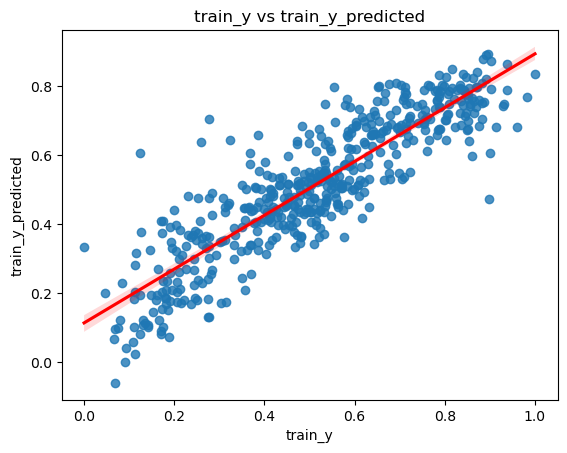

In [62]:
# Let's visualise the data with a scatter plot and the fitted regression line

train_y_pred = lr5.predict(train_X_sm)
sns.regplot(x = train_y, y = train_y_pred, fit_reg = True, line_kws = {'color' : 'r'})
plt.title('train_y vs train_y_predicted')
plt.xlabel('train_y')
plt.ylabel('train_y_predicted')
plt.show()

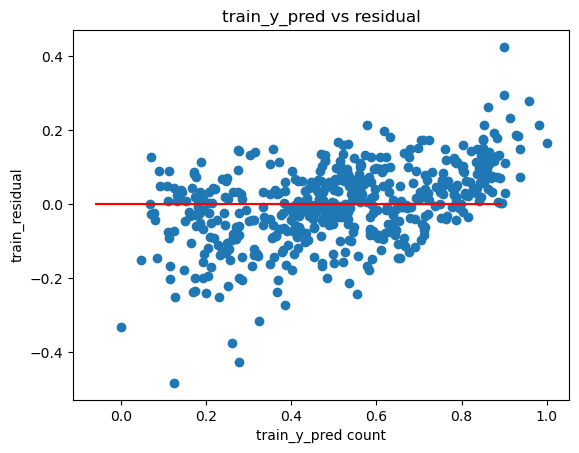

In [70]:
# Homoscedasticity
residual = train_y - train_y_pred
plt.scatter(train_y,residual)
plt.plot(train_y_pred,train_y_pred-train_y_pred,'-r')
plt.title('train_y_pred vs residual')
plt.xlabel('train_y_pred count')
plt.ylabel('train_residual')
plt.show()
#

Text(0.5, 0, 'Errors')

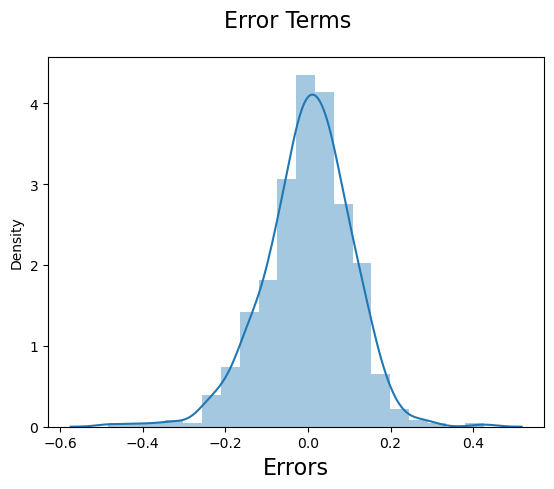

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((train_y - train_y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 16)                  # Plot heading 
plt.xlabel('Errors', fontsize = 16) 

#### Verifying the assumptions of linear regression for residuals
From the above plots:
1. Error terms have a constant variance. From Homoscedasticity plot.
2. The error terms are normally distributed

In [73]:
final_features = train_X.columns
final_features

Index(['yr', 'workingday', 'windspeed', 'spring', 'summer', 'winter',
       'light_snow', 'mist', 'jan', 'sep', 'mon'],
      dtype='object')

### Model Prediction on Test Data

#### Scaling the test data-set

In [74]:
#transforming the test data set using the min-max scaler that was used to fit the train dataset. 

test_df[num_cols]= scaler.transform(test_df[num_cols])

In [75]:
test_X = test_df[final_features]
test_y = test_df.pop('cnt')


In [76]:
print(test_X.columns)
test_y.describe()

Index(['yr', 'workingday', 'windspeed', 'spring', 'summer', 'winter',
       'light_snow', 'mist', 'jan', 'sep', 'mon'],
      dtype='object')


count    220.000000
mean       0.522154
std        0.219163
min        0.048205
25%        0.378595
50%        0.524678
75%        0.677750
max        0.963300
Name: cnt, dtype: float64

In [77]:
# Using test_X features to predict the Target variable

# Adding constant variable
test_X_sm = sm.add_constant(test_X)


In [78]:
# Predicting the target variable using test data
pred_test_y = lr5.predict(test_X_sm)

### Model Evaluation

Text(0, 0.5, 'pred_test_y')

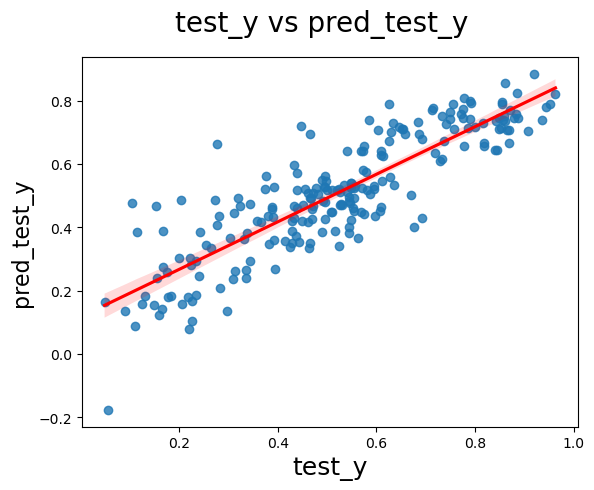

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x = test_y, y = pred_test_y, fit_reg = True, line_kws = {'color' : 'r'})
fig.suptitle('test_y vs pred_test_y', fontsize=20)         # Plot heading 
plt.xlabel('test_y', fontsize=18)                          # X-label
plt.ylabel('pred_test_y', fontsize=16)  

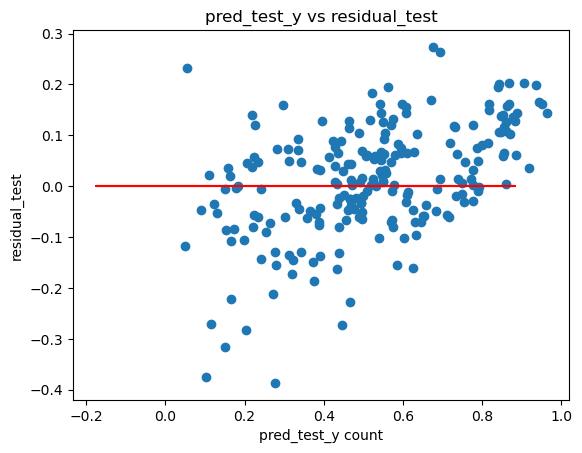

In [80]:
# Homoscedasticity
residual_test = test_y - pred_test_y
plt.scatter(test_y,residual_test)
plt.plot(pred_test_y,pred_test_y-pred_test_y,'-r')
plt.title('pred_test_y vs residual_test')
plt.xlabel('pred_test_y count')
plt.ylabel('residual_test')
plt.show()


Text(0.5, 0, 'Errors test')

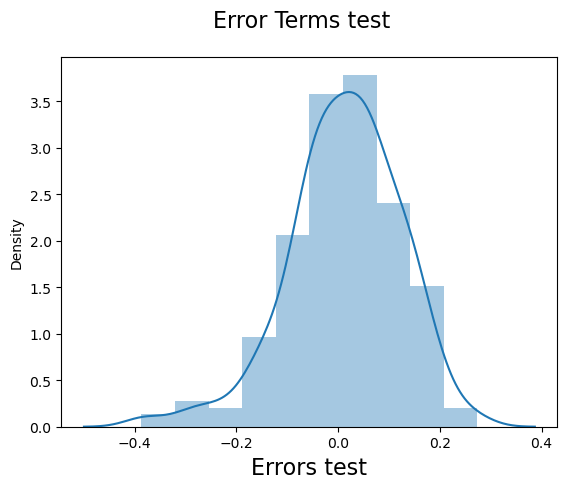

In [82]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual_test, bins = 10)
fig.suptitle('Error Terms test', fontsize = 16)                  # Plot heading 
plt.xlabel('Errors test', fontsize = 16) 

R-squared value on Test Set

In [83]:
r2 = r2_score(test_y, pred_test_y)
round(r2, 2)

0.74

In [86]:
round(lr5.params, 2)

const         0.53
yr            0.25
workingday    0.06
windspeed    -0.19
spring       -0.26
summer       -0.04
winter       -0.07
light_snow   -0.30
mist         -0.09
jan          -0.10
sep           0.07
mon           0.06
dtype: float64

#### cnt = 0.53 + 0.25 * yr  + 0.06 * workingday - 0.19 * windspeed - 0.26 * spring - 0.04 * summer - 0.07 * winter - 0.3 * light_snow - 0.09 * mist - 0.1 * jan + 0.07 * sep + 0.06 * mon

In [85]:
test_X.head()

,yr,workingday,windspeed,spring,summer,winter,light_snow,mist,jan,sep,mon
184,0,0,0.084219,0,0,0,0,1,0,0,0
535,1,1,0.153728,0,1,0,0,0,0,0,0
299,0,1,0.334206,0,0,1,0,1,0,0,0
221,0,1,0.339570,0,0,0,0,0,0,0,0
152,0,1,0.537414,0,1,0,0,0,0,0,0


In [87]:
adjusted_r_square = round(1-(1-r2)*(test_X.shape[0]-1)/(test_X.shape[0]-test_X.shape[1]-1),2)
print(adjusted_r_square)

0.73


##### Comparison of R-sqaure and Adjusted-R-Sqaure 

R square of  
 Train Data = 0.78 ,
 Test Data = 0.74

Adjusted R square of  
 Train Data = 0.77 ,
 Test Data = 0.73
 
 